<a href="https://colab.research.google.com/github/ekoly/DS-Unit-1-Build/blob/master/ipynb/explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)
plt.style.use("fivethirtyeight")

In [372]:
# retrieved from https://www.kaggle.com/rajeevw/ufcdata
# on 11/15/2019
dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/data.csv")
dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [0]:
# isolate the year column
dat_df["year"] = pd.to_datetime(dat_df["date"]).apply(lambda x: x.year)

In [0]:
# Right now we have 2 fighters per row
# I want to get 1 fighter per row. Seperate into red and blue

red = [s for s in dat_df.columns if s.startswith("R_")] + ["Winner", "year", "weight_class"]
blue = [s for s in dat_df.columns if s.startswith("B_")] + ["Winner", "year", "weight_class"]

In [375]:
dat_df[red].groupby("R_fighter").agg("mean")

,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,year
R_fighter,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Phillips,1.000000,0.000000,0.0,14.000000,12.000000,6.000000,3.000000,26.000000,9.000000,8.000000,6.000000,23.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,40.000000,18.000000,0.450000,1.000000,0.000000,0.000000,0.000000,137.000000,109.000000,0.000000,1.000000,13.000000,8.000000,6.000000,4.000000,31.000000,12.000000,31.000000,21.000000,53.000000,28.000000,0.000000,2.000000,1.000000,7.000000,1.000000,68.000000,37.000000,0.540000,1.000000,8.000000,5.000000,0.620000,129.000000,95.000000,3.00,900.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,175.26,177.80,135.0,25.000000,2014.000000
Aaron Riley,1.250000,0.000000,0.0,13.395833,11.000000,22.968750,13.677083,64.197917,21.156250,2.958333,2.166667,63.791667,16.843750,0.000000,12.937500,9.156250,0.718750,0.000000,90.125000,37.000000,0.394479,0.260417,2.718750,0.895833,0.306354,119.270833,64.031250,0.750000,3.500000,12.958333,10.812500,21.947917,12.416667,78.229167,26.635417,5.364583,2.750000,88.614583,28.729167,0.395833,3.968750,2.260417,0.000000,0.000000,105.541667,41.802083,0.392813,0.000000,3.052083,1.729167,0.244792,121.031250,56.968750,10.50,585.604167,0.0,0.0,0.000,1.500000,0.000000,0.000000,0.0,1.500000,172.72,175.26,155.0,29.000000,2010.000000
Aaron Rosa,1.000000,0.000000,0.0,16.000000,13.000000,19.000000,11.000000,160.000000,62.000000,0.000000,0.000000,158.000000,56.000000,0.000000,5.000000,4.000000,0.000000,0.000000,179.000000,73.000000,0.400000,0.000000,1.000000,0.000000,0.000000,258.000000,135.000000,0.000000,1.000000,19.000000,16.000000,27.000000,22.000000,154.000000,59.000000,7.000000,7.000000,146.000000,53.000000,0.000000,23.000000,19.000000,1.000000,0.000000,188.000000,88.000000,0.460000,0.000000,4.000000,1.000000,0.250000,304.000000,185.000000,3.00,686.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,193.04,198.12,205.0,28.000000,2011.000000
Aaron Simpson,0.250000,1.125000,0.0,9.433787,6.768481,16.586395,12.109127,32.247619,11.256406,15.888889,9.396202,47.773356,18.923753,0.620181,7.515760,7.069501,0.733107,0.000000,64.722902,32.761735,0.538778,0.240986,6.420181,2.510601,0.620871,93.132426,57.482426,2.250000,1.375000,3.974773,3.023639,17.064342,10.213209,33.774717,9.870918,1.459014,1.256293,43.471315,14.390476,0.000000,4.851984,3.926304,0.030159,0.068424,52.298073,21.340420,0.361684,0.208277,1.575737,0.301304,0.060827,64.855102,33.190703,12.25,507.185828,0.0,0.0,0.625,1.500000,1.625000,0.000000,0.0,3.750000,182.88,185.42,170.0,36.125000,2010.625000
Abdul Razak Alhassan,0.000000,1.500000,0.0,1.000000,0.625000,4.500000,3.375000,30.875000,12.625000,2.500000,1.875000,35.250000,16.250000,2.125000,1.625000,1.000000,0.000000,0.125000,

In [376]:
# more exploration

# retrieved from https://www.kaggle.com/rajeevw/ufcdata
# on 11/15/2019
raw_dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/raw_total_fight_data.csv", sep=";")
raw_dat_df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64%,0%,11 of 17,0 of 3,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,7 of 13,0 of 1,1 of 1,0 of 1,3 of 3,0 of 1,5 of 8,0 of 3,0 of 0,0 of 0,6 of 9,0 of 0,KO/TKO,1,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100%,50%,4 of 4,16 of 20,1 of 2,0 of 0,50%,0%,2,0,0,0,0,0,1 of 1,1 of 4,0 of 0,1 of 1,0 of 0,2 of 3,0 of 0,1 of 1,0 of 0,1 of 1,1 of 1,2 of 6,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock
5141,Royce Gracie,Art Jimmerson,0,0,0 of 3,0 of 0,0%,0%,4 of 7,0 of 0,1 of 1,0 of 0,100%,0%,0,0,2,0,0,0,0 of 1,0 of 0,0 of 0,0 of 0,0 of 2,0 of 0,0 of 3,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,Submission,1,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie
5142,Kevin Rosier,Zane Frazier,2,0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,12 of 23,7 of 19,3 of 4,3 of 6,0 of 0,2 of 3,4 of 10,0 of 7,4 of 9,10 of 19,7 of 8,2 of 2,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier


In [377]:
# retrieved from https://www.kaggle.com/rajeevw/ufcdata
# on 11/15/2019
fighter_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/raw_fighter_details.csv")
fighter_df.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [378]:
fighter_df.isnull().sum()

fighter_name       0
Height           263
Weight            75
Reach           1744
Stance           874
DOB              740
dtype: int64

In [379]:
dat_df.pivot_table(values="R_avg_LEG_att", index="R_fighter")

,R_avg_LEG_att
R_fighter,
Aaron Phillips,3.000000
Aaron Riley,12.937500
Aaron Rosa,5.000000
Aaron Simpson,7.515760
Abdul Razak Alhassan,1.625000
...,...
Zach Makovsky,7.333333
Zak Cummings,5.597143
Zak Ottow,7.333333


In [380]:
# retrieved from https://docs.google.com/spreadsheets/d/1z3QX0uWXv-XHX2Nfuj6zZHrfEeXI3A9CKWkrGaBzB8s/edit#gid=0
# on 11/15/2019
sheet_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/ALL%20UFC%20FIGHTERS%202_23_2016%20SHERDOG.COM%20-%20Sheet1.csv")
sheet_df

,url,fid,name,nick,birth_date,height,weight,association,class,locality,country
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States
...,...,...,...,...,...,...,...,...,...,...,...
1556,/fighter/Thaddeus-Luster-30,30,Thaddeus Luster,NaN,NaN,75.0,200.0,NaN,Light Heavyweight,"Van Nuys, California",United States
1557,/fighter/Frank-Hamaker-29,29,Frank Hamaker,NaN,NaN,74.0,245.0,NaN,Heavyweight,Amsterdam,Netherlands
1558,/fighter/Ryan-Parker-119,119,Ryan Parker,NaN,NaN,75.0,235.0,NaN,Heavyweight,"Moorehead, Minnesota",United States
1559,/fighter/Marcus-Davis-8592,8592,Marcus Davis,The Irish Hand Grenade,8/24/1973,68.0,170.0,Team Irish,Welterweight,"Bangor, Maine",United States


In [381]:
sheet_df.dtypes

url             object
fid              int64
name            object
nick            object
birth_date      object
height         float64
weight         float64
association     object
class           object
locality        object
country         object
dtype: object

In [382]:
# Perhaps we can do something with fighters by birth year?
# Need to isolate birth year

import re

year_re = re.compile(r"\d+\/\d+\/(?P<year>\d+)")
year_re.search("7/30/1977").group("year")

'1977'

In [383]:
def getYear(s):
    
    if not s or not isinstance(s, str):
        return np.NaN
    
    m = year_re.search(s)
    
    if not m:
        return np.NaN
    
    return np.int64(m.group("year"))


sheet_df["birth_year"] = sheet_df["birth_date"].apply(getYear)
sheet_df.head()

,url,fid,name,nick,birth_date,height,weight,association,class,locality,country,birth_year
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland,1988.0
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States,1987.0
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States,1981.0
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States,1985.0
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States,1986.0


In [0]:
# unify country names

sheet_df = sheet_df.replace("USA", "United States")
sheet_df = sheet_df.replace("Holland", "Netherlands")

In [385]:
sheet_df.isnull().sum()

url              0
fid              0
name             1
nick           509
birth_date     209
height          55
weight          28
association    195
class           35
locality        63
country         28
birth_year     209
dtype: int64

In [386]:
# sort fighters into age group of 5 year periods

sheet_df["age_group"] = pd.cut(sheet_df["birth_year"], range(1965, 1995, 5), labels=range(1965, 1990, 5))
sheet_df.head()

,url,fid,name,nick,birth_date,height,weight,association,class,locality,country,birth_year,age_group
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland,1988.0,1985
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States,1987.0,1985
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States,1981.0,1980
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States,1985.0,1980
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States,1986.0,1985


In [387]:
sheet_df.isnull().sum()

url              0
fid              0
name             1
nick           509
birth_date     209
height          55
weight          28
association    195
class           35
locality        63
country         28
birth_year     209
age_group      305
dtype: int64

In [388]:
# We'll probably want 1 graph per country
# Let's identify some of the top countries

num_fighters_by_country = sheet_df.pivot_table(values="name", index=["country"], aggfunc=len)
top_countries = num_fighters_by_country.sort_values(by="name").tail(5).index
secondary_countries = num_fighters_by_country.sort_values(by="name").tail(15).head(10).index
top_countries

Index(['England', 'Japan', 'Canada', 'Brazil', 'United States'], dtype='object', name='country')

In [0]:
top = sheet_df[sheet_df["country"].isin(top_countries)]
secondary = sheet_df[sheet_df["country"].isin(secondary_countries)]

In [390]:
num_fighters_by_year = top.pivot_table(values="name", index=["age_group", "country"], aggfunc=len)
num_fighters_by_year

name
age_group country            
1965      Brazil           11
          Canada            4
          England           2
          Japan             6
          United States    40
1970      Brazil            9
          Canada            5
          England           2
          Japan             9
          United States    82
1975      Brazil           41
          Canada           19
          England          12
          Japan            14
          United States   173
1980      Brazil           68
          Canada           30
          England          13
          Japan            14
          United States   278
1985      Brazil           44
          Canada           11
          England          12
          Japan             7
          United States   159

In [0]:
num_fighters_by_year.columns = ["num_fighters"]

In [0]:
num_fighters_by_year = num_fighters_by_year.reset_index(level=["age_group", "country"])

Text(0.5, 1.0, 'Number of fighters from High Participation Countries by Age Group')

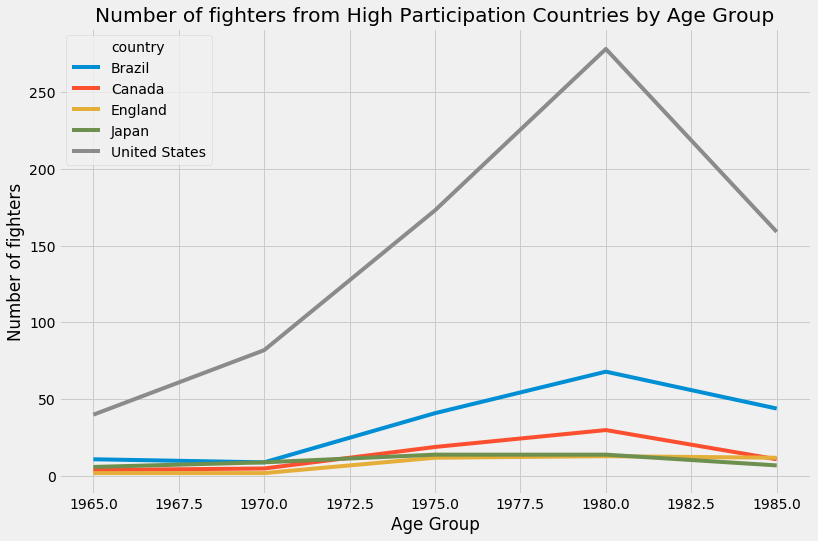

In [425]:
# Let's graph number of fighters per age group by country

fig, ax = plt.subplots(figsize=(12, 8))


sns.lineplot(x=num_fighters_by_year["age_group"], y=num_fighters_by_year["num_fighters"], hue=num_fighters_by_year["country"], ax=ax)
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of fighters")
ax.set_title("Number of fighters from High Participation Countries by Age Group")
#ax.set_ylim([0, 50])

/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


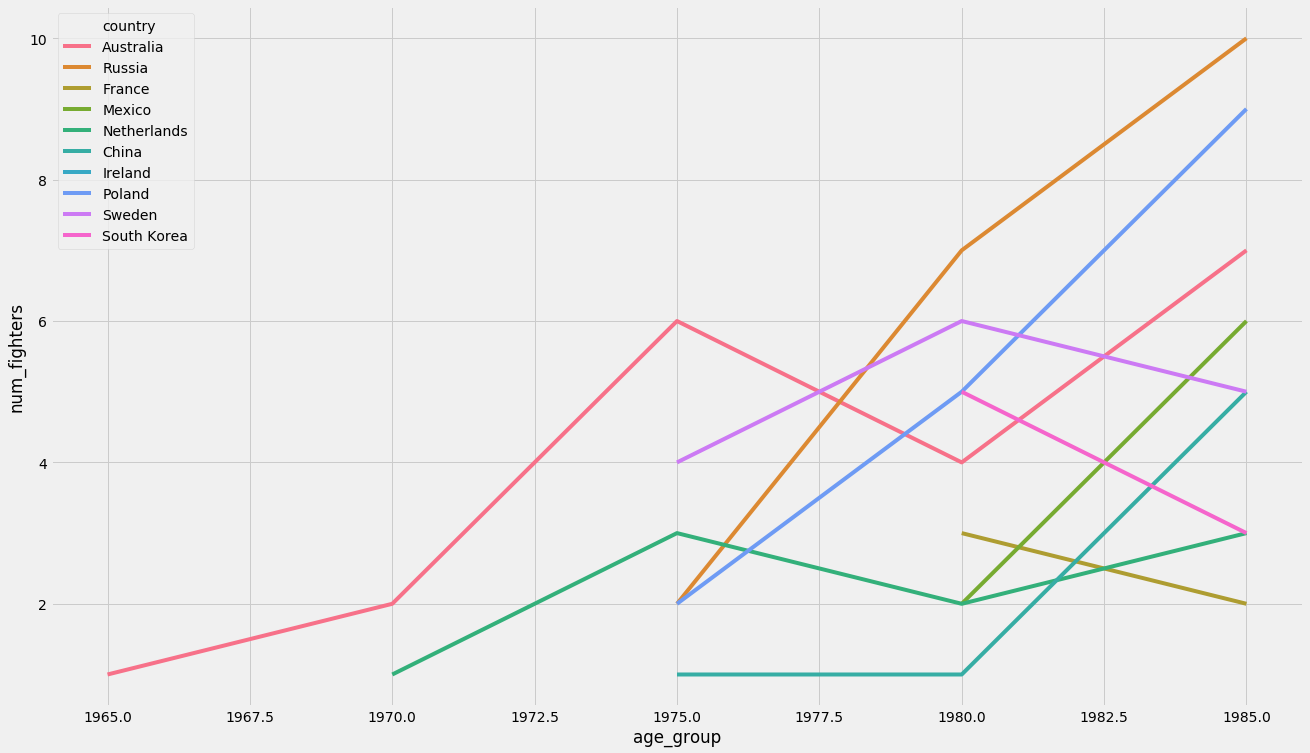

In [394]:
# same thing with a different set of countries

num_fighters_by_year_sec = secondary.pivot_table(values="name", index=["age_group", "country"], aggfunc=len)
num_fighters_by_year_sec.columns = ["num_fighters"]
num_fighters_by_year_sec = num_fighters_by_year_sec.reset_index(level=["age_group", "country"])

fig, ax = plt.subplots(figsize=(20, 12))


sns.lineplot(x=num_fighters_by_year_sec["age_group"], y=num_fighters_by_year_sec["num_fighters"], hue=num_fighters_by_year_sec["country"], ax=ax)
#ax.set_ylim([0, 50])

In [0]:
# now I'd like to do per-capita measurements
# For this we'll need country population data

In [396]:
# retrieved from https://stats.oecd.org/Index.aspx?DataSetCode=POP_PROJ#
# on 11/17/2019
pop_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-1-Build/master/csv/POP_PROJ_17112019195558853.csv")
pop_df.head()

,LOCATION,Country,SEX,Sex,AGE,Age,VAR,Variant,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,MA,Males,D199G501,Population (hist&proj) 15-64,VAR1,Baseline,1950,1950,PER,Persons,3,Thousands,NaN,NaN,2709.7,NaN,NaN
1,AUS,Australia,MA,Males,D199G501,Population (hist&proj) 15-64,VAR1,Baseline,1951,1951,PER,Persons,3,Thousands,NaN,NaN,2775.9,NaN,NaN
2,AUS,Australia,MA,Males,D199G501,Population (hist&proj) 15-64,VAR1,Baseline,1952,1952,PER,Persons,3,Thousands,NaN,NaN,2837.0,NaN,NaN
3,AUS,Australia,MA,Males,D199G501,Population (hist&proj) 15-64,VAR1,Baseline,1953,1953,PER,Persons,3,Thousands,NaN,NaN,2869.4,NaN,NaN
4,AUS,Australia,MA,Males,D199G501,Population (hist&proj) 15-64,VAR1,Baseline,1954,1954,PER,Persons,3,Thousands,NaN,NaN,2897.3,NaN,NaN


In [397]:
pop_df["Age"].value_counts()

Population (hist&proj) All ages               14664
Population (hist&proj)  25-29                  7362
Population (hist&proj)  75-79                  7362
Population (hist&proj)  50-54                  7362
Population (hist&proj)  55-59                  7362
Population (hist&proj)  70-74                  7362
Population (hist&proj) < 15                    7362
Population (hist&proj) 15-64                   7362
Population (hist&proj)  10-14                  7362
Population (hist&proj)  00-04                  7362
Population (hist&proj)  65-69                  7362
Population (hist&proj)  40-44                  7362
Population (hist&proj)  60-64                  7362
Population (hist&proj) 20-64                   7362
Population (hist&proj)  45-49                  7362
Population (hist&proj) < 20                    7362
Population (hist&proj)  35-39                  7362
Population (hist&proj)  30-34                  7362
Population (hist&proj)  20-24                  7362
Population (

In [398]:
# we'll use population of all ages
pop_df = pop_df[pop_df["Age"] == "Population (hist&proj) All ages"]
pop_df.head()

,LOCATION,Country,SEX,Sex,AGE,Age,VAR,Variant,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
35745,AUS,Australia,MA,Males,D199G5TT,Population (hist&proj) All ages,VAR1,Baseline,1950,1950,PER,Persons,3,Thousands,NaN,NaN,4122.9,NaN,NaN
35746,AUS,Australia,MA,Males,D199G5TT,Population (hist&proj) All ages,VAR1,Baseline,1951,1951,PER,Persons,3,Thousands,NaN,NaN,4253.7,NaN,NaN
35747,AUS,Australia,MA,Males,D199G5TT,Population (hist&proj) All ages,VAR1,Baseline,1952,1952,PER,Persons,3,Thousands,NaN,NaN,4372.6,NaN,NaN
35748,AUS,Australia,MA,Males,D199G5TT,Population (hist&proj) All ages,VAR1,Baseline,1953,1953,PER,Persons,3,Thousands,NaN,NaN,4462.6,NaN,NaN
35749,AUS,Australia,MA,Males,D199G5TT,Population (hist&proj) All ages,VAR1,Baseline,1954,1954,PER,Persons,3,Thousands,NaN,NaN,4546.1,NaN,NaN


In [0]:
pop_df = pop_df.pivot_table(values="Value", index=["Country", "Time"], aggfunc=np.sum).reset_index(["Country", "Time"])

In [400]:
fighters_df = pd.merge(pop_df, num_fighters_by_year, left_on=["Country", "Time"], right_on=["country", "age_group"])
fighters_df

,Country,Time,Value,age_group,country,num_fighters
0,Brazil,1965,337555.92,1965,Brazil,11
1,Brazil,1970,384313.20,1970,Brazil,9
2,Brazil,1975,432896.36,1975,Brazil,41
3,Brazil,1980,474250.10,1980,Brazil,68
4,Brazil,1985,531997.16,1985,Brazil,44
5,Canada,1965,80137.00,1965,Canada,4
6,Canada,1970,86984.00,1970,Canada,5
7,Canada,1975,92576.00,1975,Canada,19
8,Canada,1980,98068.00,1980,Canada,30
9,Canada,1985,103370.00,1985,Canada,11


In [401]:
fighters_df["per_capita_fighters"] = fighters_df["num_fighters"]/fighters_df["Value"]*1000.
fighters_df

,Country,Time,Value,age_group,country,num_fighters,per_capita_fighters
0,Brazil,1965,337555.92,1965,Brazil,11,0.032587
1,Brazil,1970,384313.20,1970,Brazil,9,0.023418
2,Brazil,1975,432896.36,1975,Brazil,41,0.094711
3,Brazil,1980,474250.10,1980,Brazil,68,0.143384
4,Brazil,1985,531997.16,1985,Brazil,44,0.082707
5,Canada,1965,80137.00,1965,Canada,4,0.049915
6,Canada,1970,86984.00,1970,Canada,5,0.057482
7,Canada,1975,92576.00,1975,Canada,19,0.205237
8,Canada,1980,98068.00,1980,Canada,30,0.305910
9,Canada,1985,103370.00,1985,Canada,11,0.106414


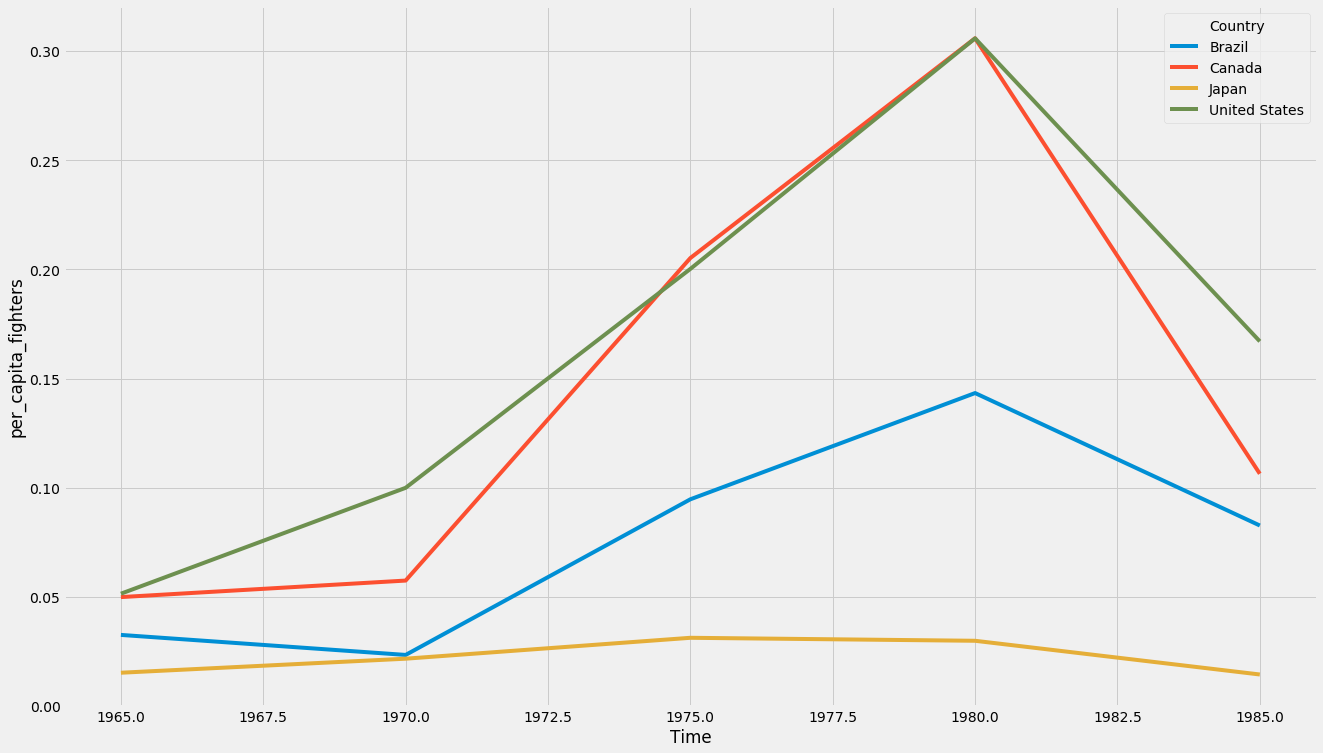

In [402]:
# Now, plot the per-capita-per-1000 fighters

fig, ax = plt.subplots(figsize=(20, 12))


sns.lineplot(x=fighters_df["Time"], y=fighters_df["per_capita_fighters"], hue=fighters_df["Country"], ax=ax)
#ax.set_ylim([0, 50])

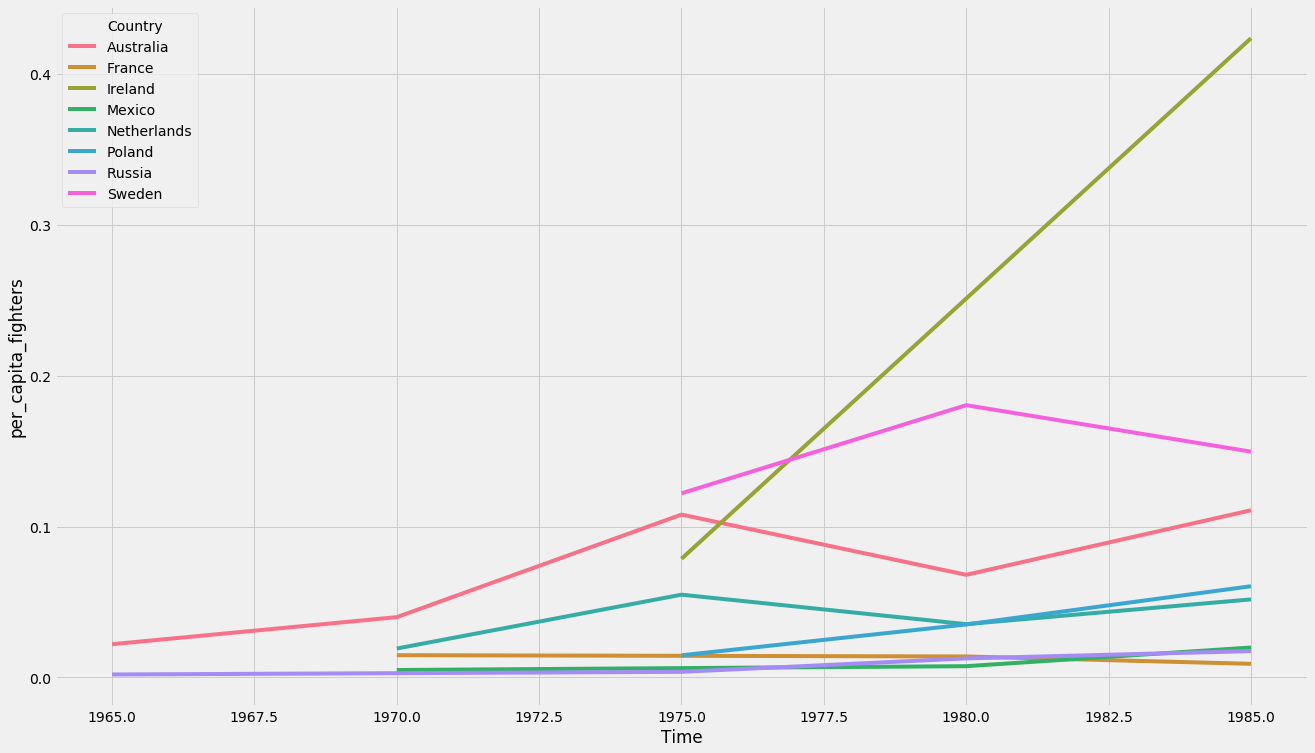

In [403]:
# same thing with another set of countries

fighters_sec_df = pd.merge(pop_df, num_fighters_by_year_sec, left_on=["Country", "Time"], right_on=["country", "age_group"])

fighters_sec_df["per_capita_fighters"] = fighters_sec_df["num_fighters"]/fighters_sec_df["Value"]*1000.

fig, ax = plt.subplots(figsize=(20, 12))
sns.lineplot(x=fighters_sec_df["Time"], y=fighters_sec_df["per_capita_fighters"], hue=fighters_sec_df["Country"], ax=ax)

In [404]:
# I don't find these plots very interesting

# Next objective is to plot number of wins of each category by country

red_df = dat_df[red]
red_df["is_winner"] = red_df["Winner"] == "Red"
red_df.columns = [s.strip("R_") for s in red_df.columns]
red_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,each_cms,Weight_lbs,age,Winner,year,weight_class,is_winner
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0,Red,2019,Bantamweight,True
1,Valentina Shevchenko,0.0,2.0,0.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.00,0.000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0,Red,2019,Women's Flyweight,True
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.60,0.200,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0,Red,2019,Lightweight,True
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.00,0.375,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.25,0.0,0.0,1.0,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0,Blue,2019,Bantamweight,False
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.75,0.500,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.750000,3.0,1.0,6.250000,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,0.250000,5.500000,3.750000,0.750000,0.000000,55.000000,22.500000,0.397500,0.000000,1.000000,0.000000,0.000000,6

In [405]:
blue_df = dat_df[blue]
blue_df["is_winner"] = blue_df["Winner"] == "Blue"
blue_df.columns = [s.strip("B_") for s in blue_df.columns]
blue_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,Winner,year,weight_class,is_winner
0,Marlon Moraes,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,31.0,Red,2019,Bantamweight,False
1,Jessica Eye,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,9.300000,12.800000,9.60000,101.700000,32.000000,8.100000,6.900000,97.700000,30.800000,0.100000,11.90000,8.400000,1.400000,0.000000,122.600000,48.50000,0.408000,0.700000,2.300000,0.900000,0.231000,151.500000,75.400000,29.0,849.000000,0.0,0.0,2.0,1.0,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,32.0,Red,2019,Women's Flyweight,False
2,Donald Cerrone,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,11.870968,8.419355,5.83871,84.548387,38.064516,1.741935,0.935484,67.645161,25.483871,0.225806,9.16129,7.483871,0.032258,0.032258,94.709677,44.83871,0.453226,0.096774,2.096774,0.225806,0.063548,100.387097,49.774194,68.0,581.870968,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0,Orthodox,185.42,185.42,155.0,36.0,Red,2019,Lightweight,False
3,Petr Yan,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,6.000000,6.000000,3.75000,94.250000,26.750000,1.750000,1.250000,82.500000,21.500000,0.250000,7.25000,4.250000,0.000000,0.000000,102.000000,31.75000,0.337500,0.000000,4.500000,0.750000,0.097500,104.750000,34.250000,9.0,652.000000,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,Switch,170.18,170.18,135.0,26.0,Blue,2019,Bantamweight,True
4,Blagoy Ivanov,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,0.000000,184.500000,45.000000,0.000000,2.0,2.000000,0.000000,0.000000,203.50,61.500000,0.310000,0.000000,0.00000,0.000000,0.000000,204.000000,62.000000,1.0,1.0,42.500000,23.500000,0.500000,0.50000,205.000000,89.500000,0.000000,0.000000,152.500000,56.500000,0.000000,10.50000,10.000000,0.000000,0.000000,205.500000,90.00000,0.430000,0.000000,0.500000,0.000000,0.000000,205.500000,90.000000,8.0,12

In [406]:
fighters_df = pd.concat([red_df, blue_df])
fighters_df = fighters_df.reset_index()
fighters_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,index,Height_cms,Reach_cms,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,current_lose_streak,current_win_streak,draw,each_cms,fighter,is_winner,longest_win_streak,losses,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,year
0,0,162.56,NaN,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,0.0,4.0,0.0,162.56,Henry Cejudo,True,4.0,2.0,27.0,742.60,3.0,Bantamweight,0.0,2.0,4.0,2.0,0.0,0.0,8.0,2019
1,1,165.10,NaN,Southpaw,125.0,Red,31.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.00,0.000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,0.0,2.0,0.0,167.64,Valentina Shevchenko,True,2.0,2.0,25.0,1062.00,2.0,Women's Flyweight,0.0,1.0,2.0,0.0,2.0,0.0,5.0,2019
2,2,180.34,NaN,Orthodox,155.0,Red,35.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.60,0.200,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,0.0,11.0,0.0,193.04,Tony Ferguson,True,11.0,1.0,33.0,604.40,2.0,Lightweight,0.0,1.0,3.0,3.0,6.0,1.0,14.0,2019
3,3,162.56,NaN,Orthodox,135.0,Blue,29.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.00,0.375,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,1.0,0.0,0.0,172.72,Jimmie Rivera,False,5.0,2.0,20.0,690.25,0.0,Bantamweight,0.0,1.0,4.0,1.0,0.0,0.0,6.0,2019
4,4,187.96,NaN,Southpaw,264.0,Blue,26.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.75,0.500,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.750000,6.250000,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,0.250000,5.500000,3.750000,0.750000,0.000000,55.000000,22.500000,

In [407]:
fighters_df = fighters_df.merge(sheet_df, left_on="fighter", right_on="name")
fighters_df

,index,Height_cms,Reach_cms,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,current_lose_streak,current_win_streak,draw,each_cms,fighter,is_winner,longest_win_streak,losses,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,year,url,fid,name,nick,birth_date,height,weight,association,class,locality,country,birth_year,age_group
0,0,162.56,NaN,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.900000,0.400000,5.300000,3.700000,1.200000,0.0,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.0,0.0,98.800000,32.200000,0.336000,0.0,0.900000,0.100000,0.050000,110.500000,43.300000,0.0,4.0,0.0,162.56,Henry Cejudo,True,4.0,2.0,27.0,742.600000,3.0,Bantamweight,0.0,2.0,4.0,2.0,0.0,0.0,8.0,2019,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985
1,210,162.56,NaN,Orthodox,135.0,Red,31.0,24.222222,18.111111,18.888889,12.222222,82.666667,29.111111,8.555556,5.555556,80.000000,24.666667,0.333333,5.888889,4.111111,1.333333,0.0,110.111111,46.888889,0.431111,0.111111,5.888889,2.111111,0.508889,141.777778,74.777778,14.777778,9.777778,8.333333,5.666667,100.222222,29.666667,0.888889,0.333333,84.444444,19.222222,0.111111,10.222222,6.666667,0.0,0.0,109.444444,35.666667,0.336667,0.0,1.000000,0.111111,0.055556,122.444444,48.000000,0.0,3.0,0.0,162.56,Henry Cejudo,True,4.0,2.0,26.0,821.555556,2.0,Flyweight,0.0,2.0,4.0,1.0,0.0,0.0,7.0,2019,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985
2,733,162.56,NaN,Orthodox,135.0,Red,30.0,25.714286,19.285714,20.714286,12.857143,81.142857,30.714286,6.857143,4.285714,77.571429,25.000000,0.428571,5.428571,3.571429,1.000000,0.0,108.714286,47.857143,0.444286,0.142857,5.285714,1.857143,0.530000,135.714286,72.571429,15.428571,9.428571,9.428571,6.142857,97.714286,24.428571,0.428571,0.142857,86.714286,18.714286,0.142857,5.428571,2.571429,0.0,0.0,107.571429,30.714286,0.311429,0.0,0.857143,0.000000,0.000000,116.571429,39.000000,0.0,1.0,0.0,162.56,Henry Cejudo,True,4.0,2.0,18.0,713.428571,1.0,Flyweight,0.0,1.0,3.0,1.0,0.0,0.0,5.0,2017,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985
3,860,162.56,NaN,Orthodox,135.0,Red,30.0,28.666667,21.333333,23.666667,14.666667,87.833333,31.833333,5.666667,3.666667,82.666667,25.166667,0.333333,5.833333,3.666667,1.166667,0.0,117.166667,50.166667,0.421667,0.166667,5.833333,1.833333,0.451667,147.666667,78.166667,18.000000,11.000000,11.000000,7.166667,109.833333,27.666667,0.500000,0.166667,97.166667,21.166667,0.166667,6.166667,2.833333,0.0,0.0,121.333333,35.000000,0.330000,0.0,0.833333,0.000000,0.000000,131.833333,44.666667,2.0,0.0,0.0,162.56,Henry Cejudo,True,4.0

In [0]:
values = ["win_by_Decision_Majority", "win_by_Decision_Split", "win_by_Decision_Unanimous", "win_by_KO/TKO", "win_by_Submission", "win_by_TKO_Doctor_Stoppage"]
#values = ["avg_TOTAL_STR_att", "avg_TOTAL_STR_landed", "avg_TD_att", "avg_TD_landed", "avg_SUB_ATT"]


In [409]:
wins_df = fighters_df.pivot_table(values=values, index=["age_group", "country"]).reset_index(["age_group", "country"])
wins_df

,age_group,country,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage
0,1965,Australia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1965,Brazil,0.000000,0.000000,0.000000,0.342105,3.815789,0.000000
2,1965,Canada,0.000000,0.000000,0.000000,1.529412,0.000000,0.000000
3,1965,England,0.000000,0.000000,0.375000,0.500000,0.000000,0.000000
4,1965,Japan,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
...,...,...,...,...,...,...,...,...
98,1985,Singapore,0.000000,0.333333,0.666667,0.000000,0.000000,0.000000
99,1985,South Korea,0.000000,0.230769,0.000000,0.384615,1.076923,0.000000
100,1985,Sweden,0.000000,0.000000,0.913043,1.913043,1.173913,0.000000
101,1985,Taiwan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


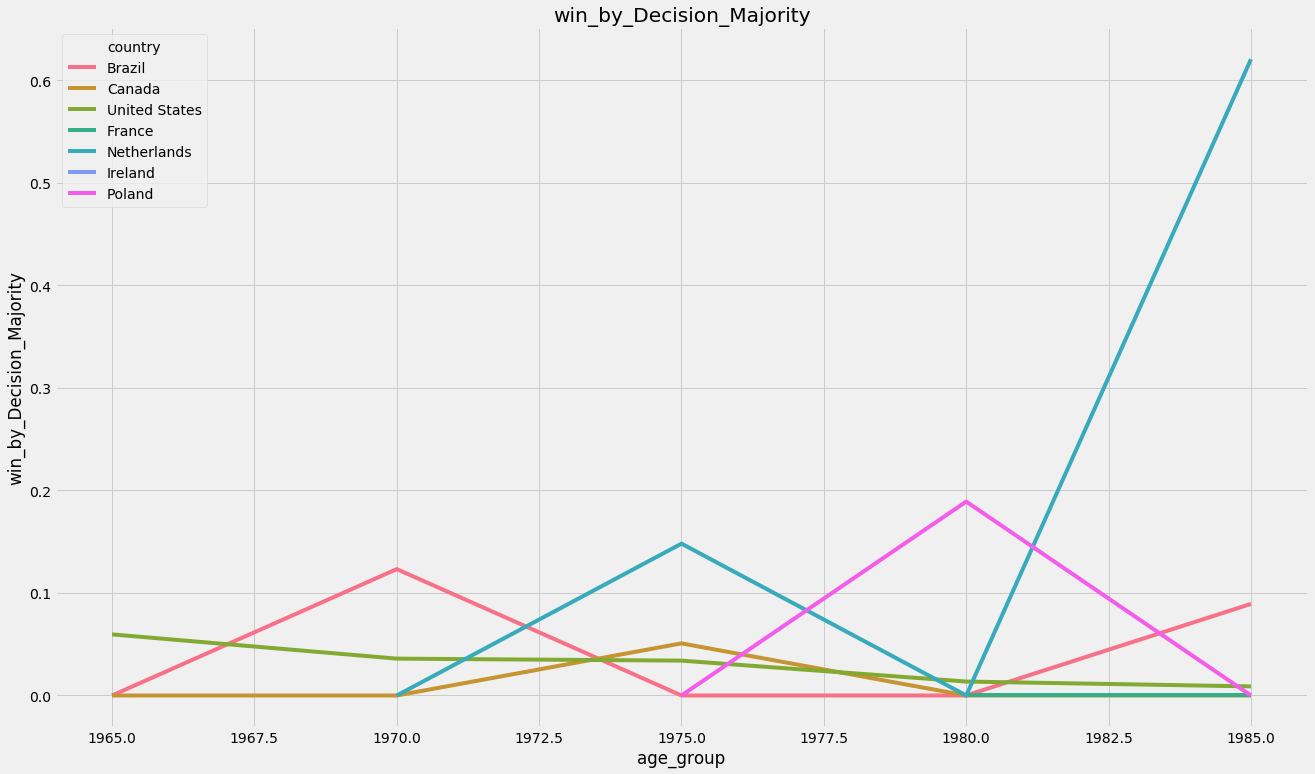

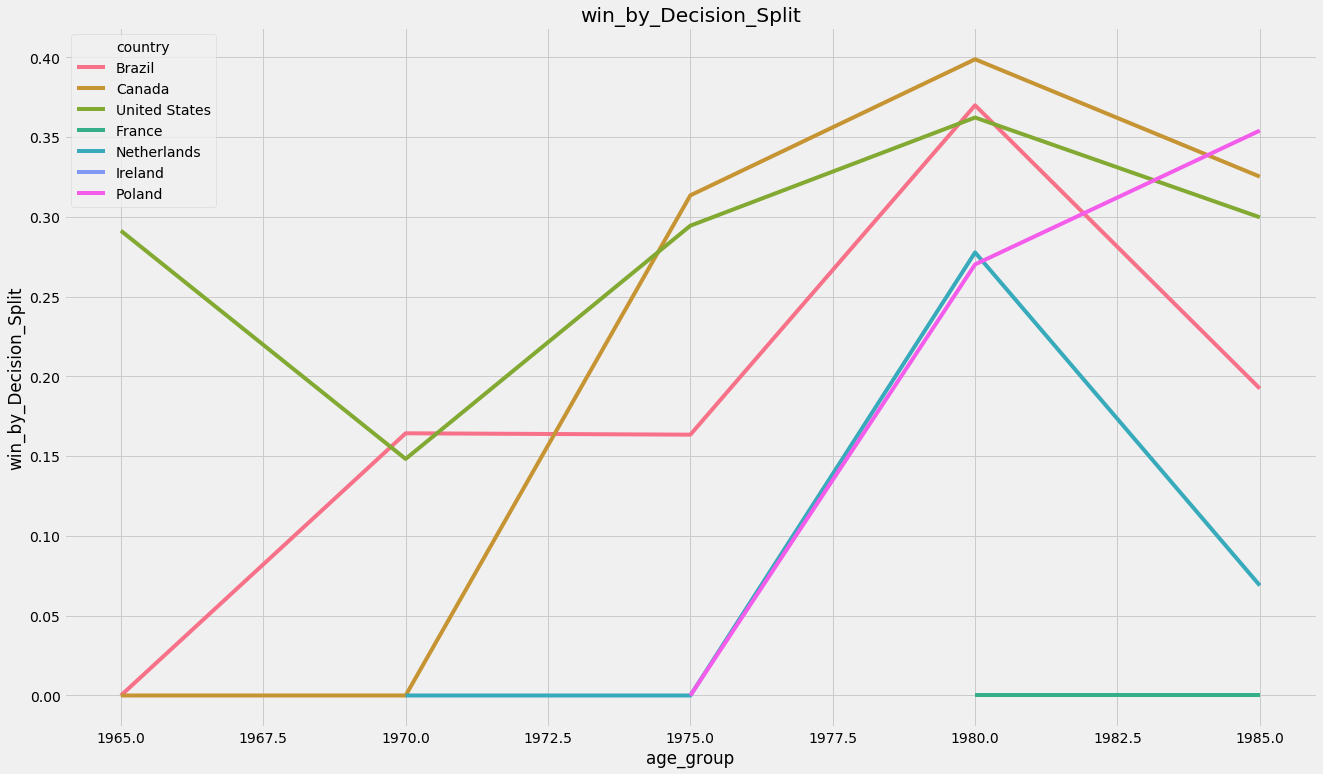

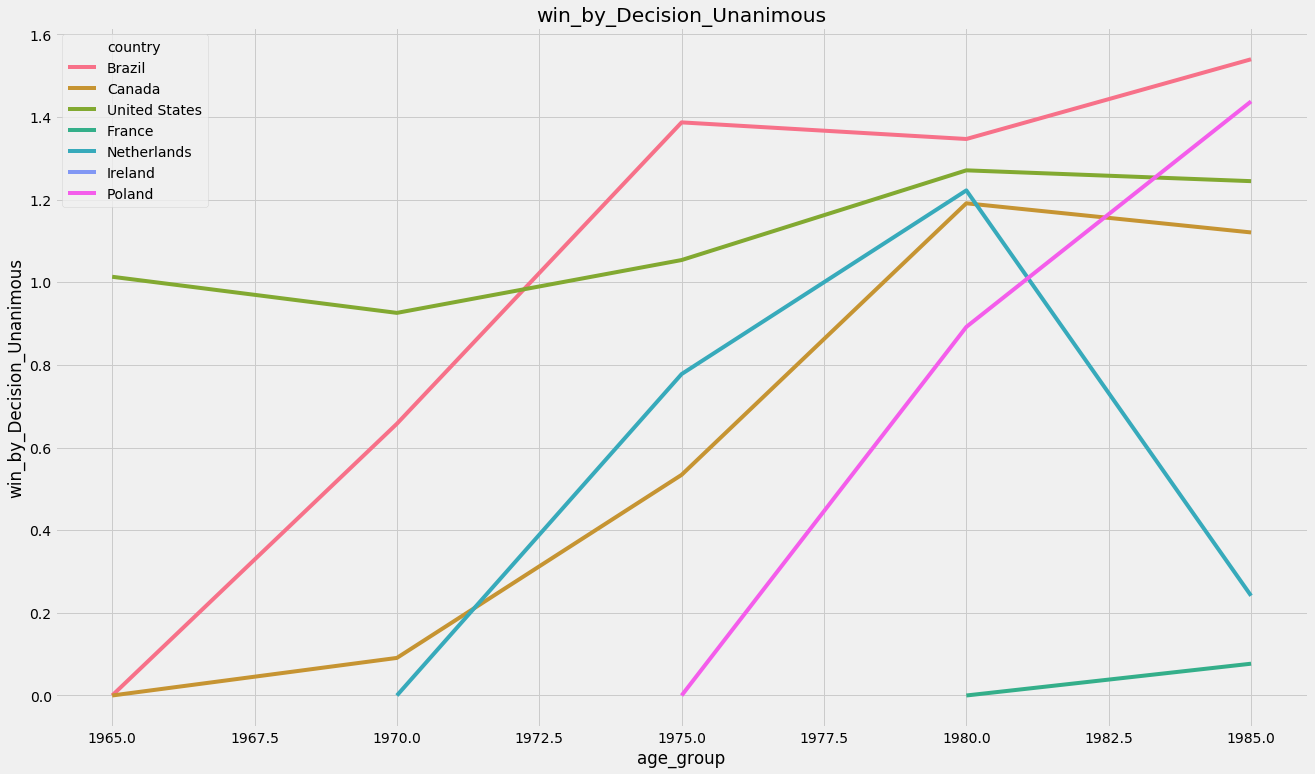

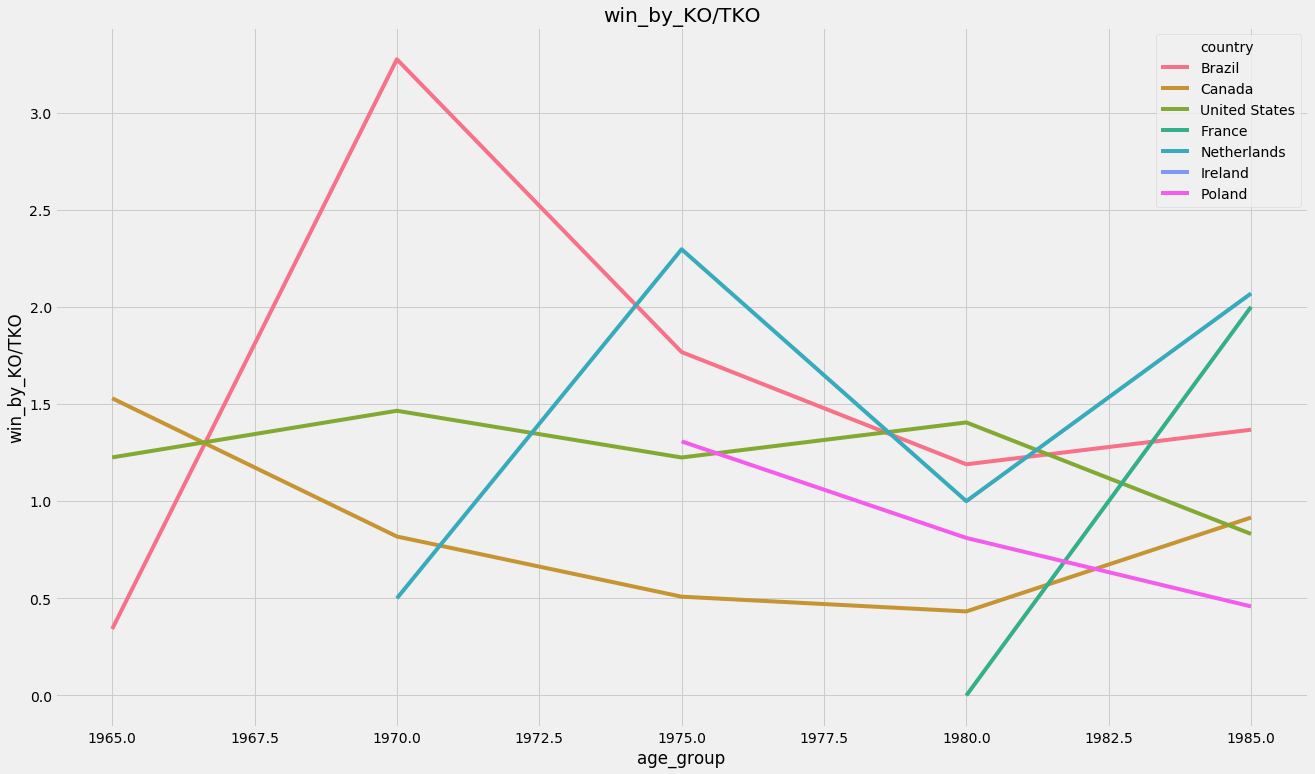

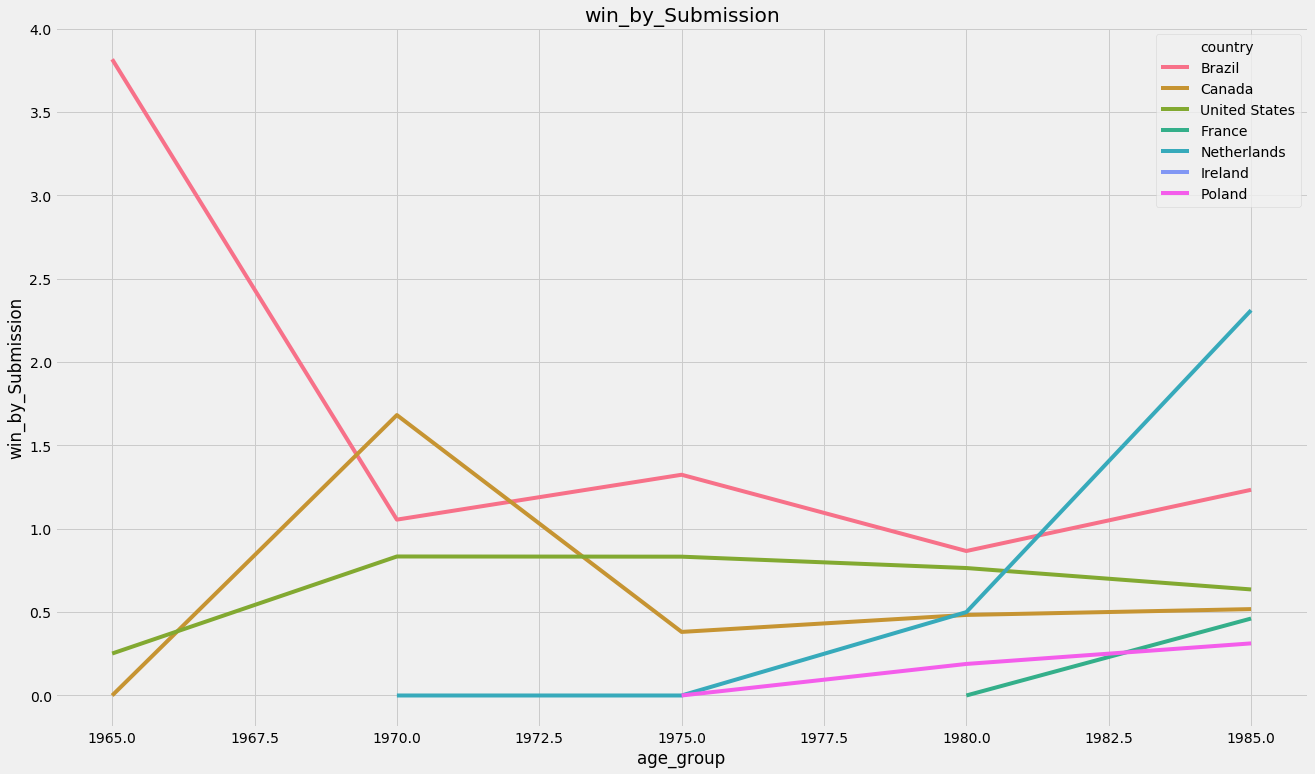

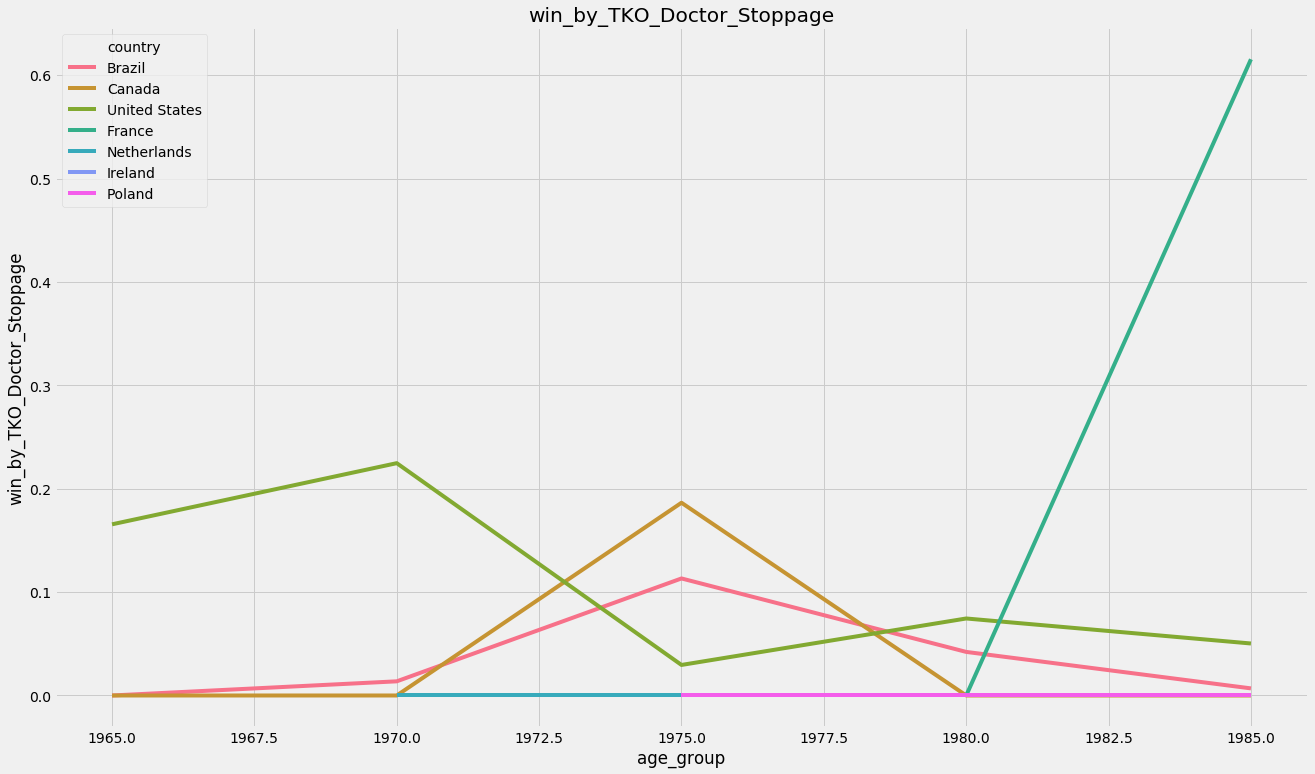

In [410]:
countries = ["United States", "Netherlands", "France", "Brazil", "Poland"]

def graphByCountries(data, x="age_group", y="win_by_Decision_Majority", hue="country"):

  fig, ax = plt.subplots(figsize=(20, 12))
  sns.lineplot(x=data[x], y=data[y], hue=data[hue], ax=ax)
  return ax

for value in values:
  countries = wins_df.sort_values(by=values).tail(10)["country"]
  ax = graphByCountries(wins_df[wins_df["country"].isin(countries)], y=value)
  ax.set_title(value)

In [411]:
# do the same except with different types of strikes/attacks

values = ["win_by_Submission", "avg_TD_att", "avg_TD_landed", "avg_SUB_ATT"]

strikes_df = fighters_df.pivot_table(values=values, index=["country", "year"]).reset_index(["country", "year"])
strikes_df

,country,year,avg_SUB_ATT,avg_TD_att,avg_TD_landed,win_by_Submission
0,Afghanistan,2012,NaN,NaN,NaN,0.0
1,Afghanistan,2013,0.000000,0.000000,0.000000,0.0
2,Afghanistan,2016,0.000000,0.666667,0.333333,0.0
3,Afghanistan,2017,0.250000,1.250000,1.000000,1.0
4,Afghanistan,2018,0.366667,1.000000,0.816667,1.0
...,...,...,...,...,...,...
461,Venezuela,2012,NaN,NaN,NaN,0.0
462,Venezuela,2013,0.250000,3.250000,0.500000,0.0
463,Venezuela,2014,0.261111,3.122222,1.300000,0.0
464,Venezuela,2015,0.166667,4.833333,1.666667,0.0


In [412]:
strikes_df = strikes_df.melt(id_vars=["country", "year"], value_vars=values)
strikes_df

,country,year,variable,value
0,Afghanistan,2012,win_by_Submission,0.000000
1,Afghanistan,2013,win_by_Submission,0.000000
2,Afghanistan,2016,win_by_Submission,0.000000
3,Afghanistan,2017,win_by_Submission,1.000000
4,Afghanistan,2018,win_by_Submission,1.000000
...,...,...,...,...
1859,Venezuela,2012,avg_SUB_ATT,NaN
1860,Venezuela,2013,avg_SUB_ATT,0.250000
1861,Venezuela,2014,avg_SUB_ATT,0.261111
1862,Venezuela,2015,avg_SUB_ATT,0.166667


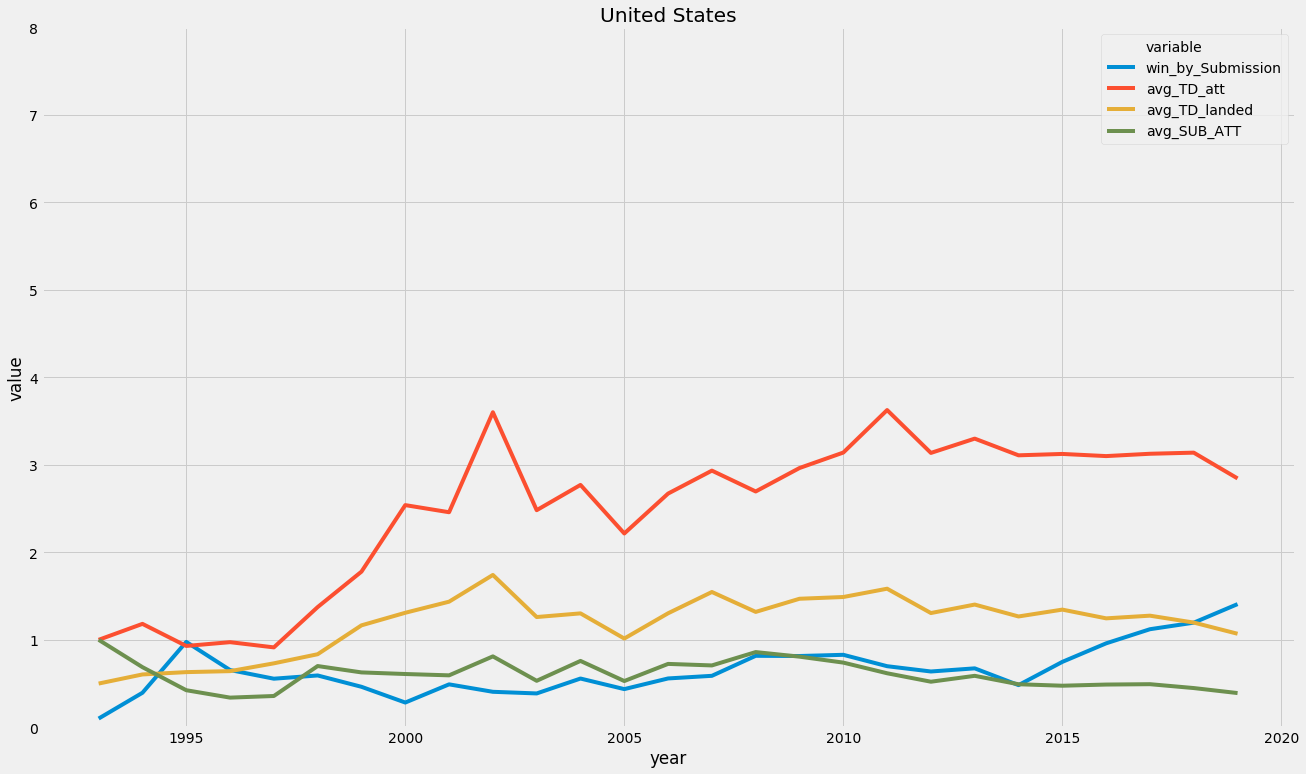

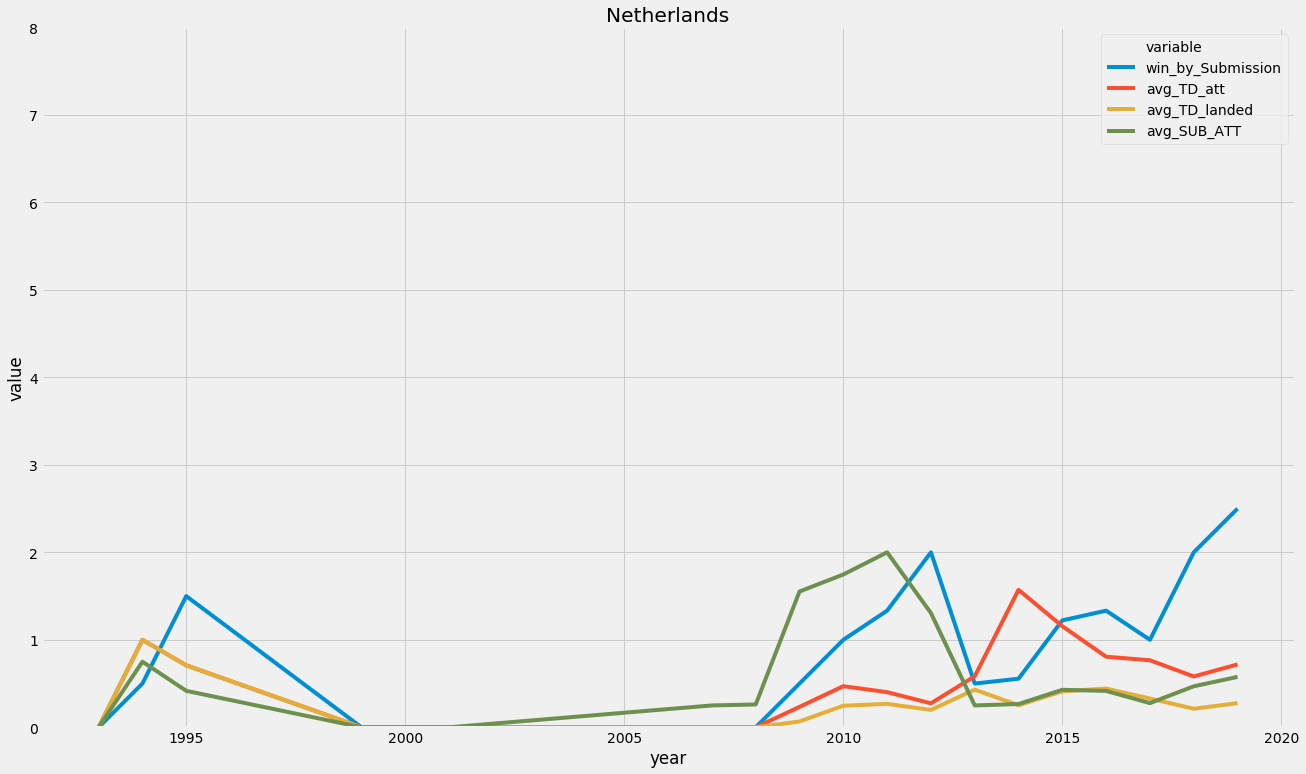

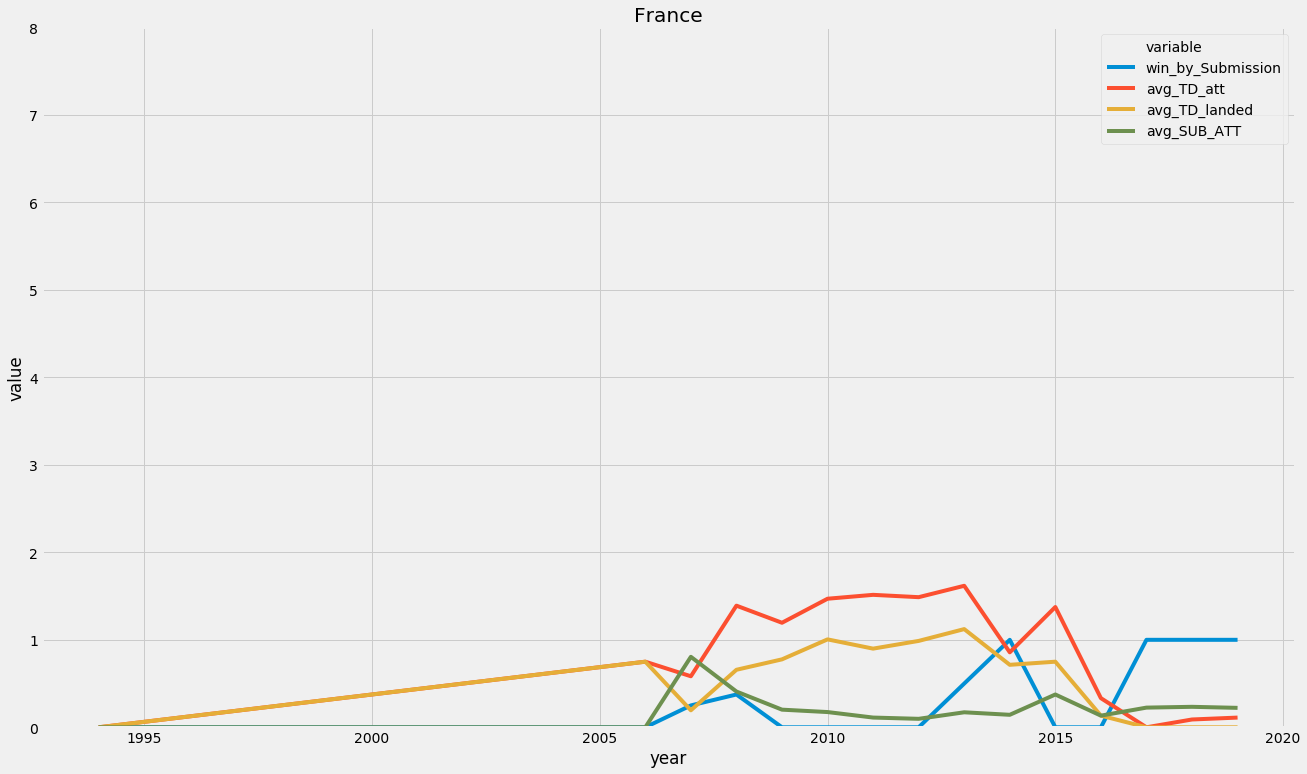

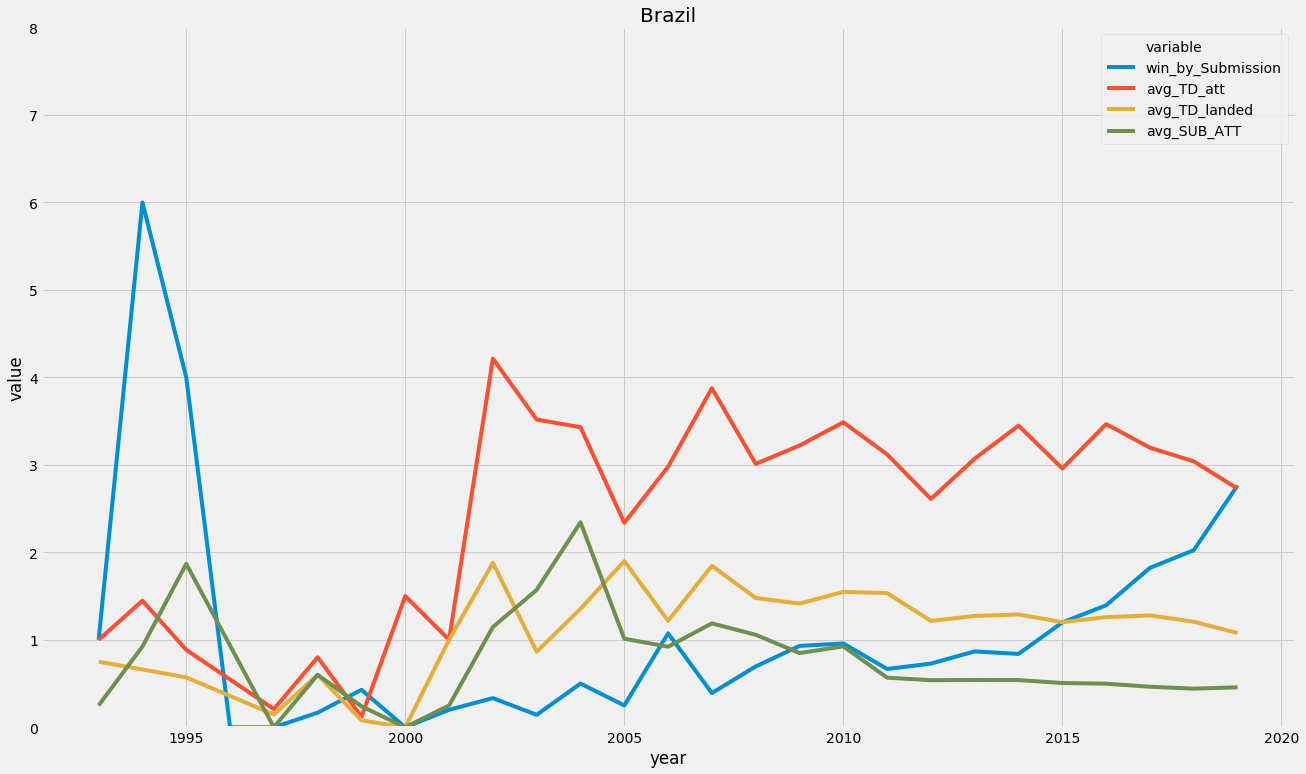

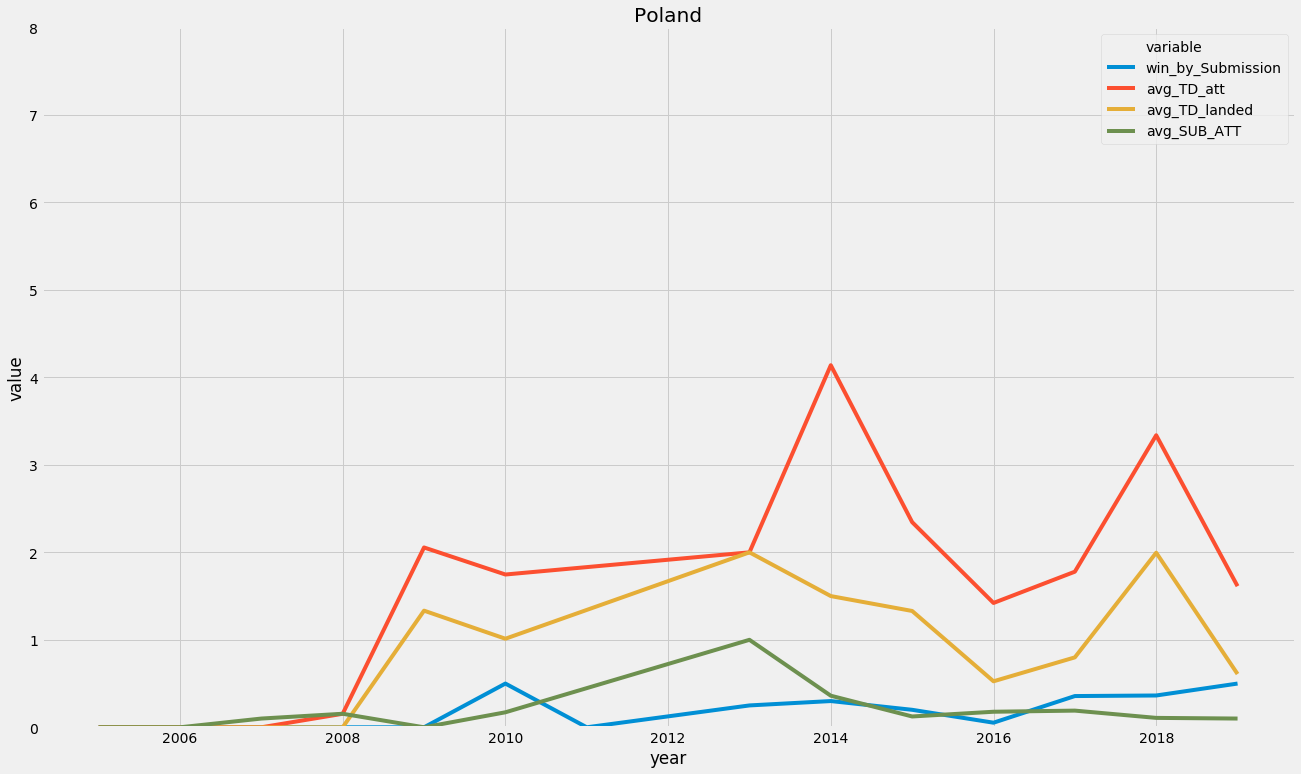

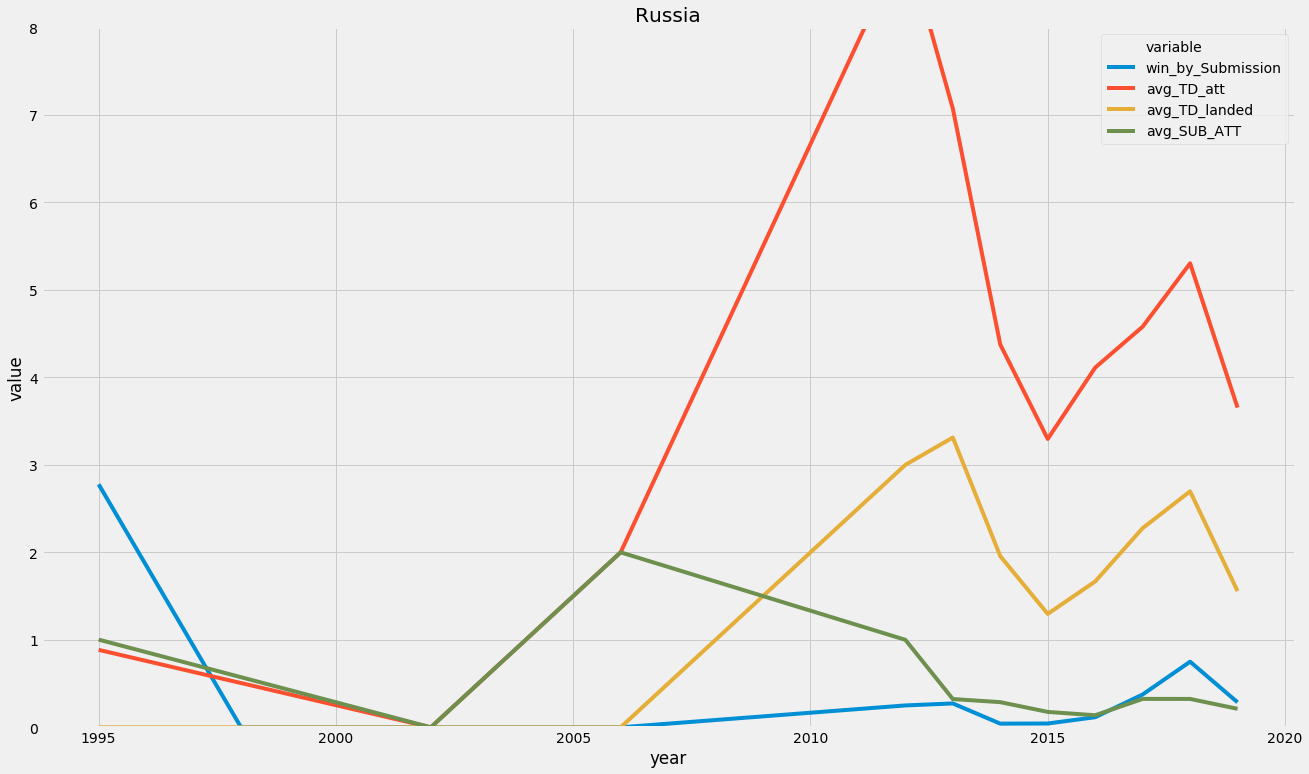

In [413]:
countries = ["United States", "Netherlands", "France", "Brazil", "Poland", "Russia"]

for country in countries:
  ax = graphByCountries(strikes_df[strikes_df["country"] == country], x="year", y="value", hue="variable")
  ax.set_title(country)
  ax.set_ylim([0, 8])

In [414]:
# the above is difficult to read and isn't very interesting

# now let's proportion (rather than total number) of wins in each category by country over time
# we'll also try using the raw data instead of the preprocessed data
raw_dat_df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64%,0%,11 of 17,0 of 3,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,7 of 13,0 of 1,1 of 1,0 of 1,3 of 3,0 of 1,5 of 8,0 of 3,0 of 0,0 of 0,6 of 9,0 of 0,KO/TKO,1,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100%,50%,4 of 4,16 of 20,1 of 2,0 of 0,50%,0%,2,0,0,0,0,0,1 of 1,1 of 4,0 of 0,1 of 1,0 of 0,2 of 3,0 of 0,1 of 1,0 of 0,1 of 1,1 of 1,2 of 6,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock
5141,Royce Gracie,Art Jimmerson,0,0,0 of 3,0 of 0,0%,0%,4 of 7,0 of 0,1 of 1,0 of 0,100%,0%,0,0,2,0,0,0,0 of 1,0 of 0,0 of 0,0 of 0,0 of 2,0 of 0,0 of 3,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,Submission,1,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie
5142,Kevin Rosier,Zane Frazier,2,0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,12 of 23,7 of 19,3 of 4,3 of 6,0 of 0,2 of 3,4 of 10,0 of 7,4 of 9,10 of 19,7 of 8,2 of 2,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier


In [415]:
# same as earlier: we want one row per fighter
both_columns = ["Referee", "Format", "last_round", "last_round_time", "win_by", "date", "Winner"]
red_columns = [col for col in raw_dat_df if col.startswith("R_")] + both_columns
blue_columns = [col for col in raw_dat_df if col.startswith("B_")] + both_columns

red = raw_dat_df[red_columns]
blue = raw_dat_df[blue_columns]

red.columns = [col.strip("R_") for col in red.columns]
blue.columns = [col.strip("B_") for col in blue.columns]

fights_df = pd.concat([red, blue])

fights_df["year"] = fights_df["date"].apply(lambda x: x[-4:]) # get year
fights_df["outcome"] = fights_df["win_by"].apply(lambda x: "Decision" if x.startswith("Decision") else x) # aggregate different types of decisions
fights_df["outcome"] = fights_df["outcome"].apply(lambda x: "TKO" if "TKO" in x else x) # aggregate different types of TKO

# merge with sheet_df which includes country of origin
fights_df = fights_df.merge(sheet_df, left_on="fighter", right_on="name")

# make a seperate dataframe for only fights in which the fighter won the fight
winners_df = fights_df[fights_df["fighter"] == fights_df["Winner"]]
winners_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


,BODY,CLINCH,DISTANCE,EV,Format,GROUND,HEAD,KD,LEG,ODY,PASS,REV,Referee,SIG_STR.,SIG_STR_pct,SUB_ATT,TD,TD_pct,TOTAL_STR.,Winner,date,eferee,fighter,last_round,last_round_time,win_by,year,outcome,url,fid,name,nick,birth_date,height,weight,association,class,locality,country,birth_year,age_group
0,13 of 16,19 of 23,45 of 118,0.0,5 Rnd (5-5-5-5-5),26 of 30,73 of 150,0,4 of 5,NaN,1,NaN,NaN,90 of 171,52%,1,1 of 4,25%,99 of 182,Henry Cejudo,"June 08, 2019",Marc Goddard,Henry Cejudo,3,4:51,KO/TKO,2019,TKO,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985
1,1 of 1,0 of 0,3 of 6,0.0,5 Rnd (5-5-5-5-5),15 of 17,17 of 22,1,0 of 0,NaN,0,NaN,NaN,18 of 23,78%,0,0 of 0,0%,18 of 23,Henry Cejudo,"January 19, 2019",Kevin MacDonald,Henry Cejudo,1,0:32,KO/TKO,2019,TKO,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985
2,10 of 13,3 of 3,16 of 56,0.0,3 Rnd (5-5-5),17 of 24,18 of 61,0,8 of 9,NaN,3,NaN,NaN,36 of 83,43%,0,3 of 5,60%,85 of 148,Henry Cejudo,"December 02, 2017",Keith Peterson,Henry Cejudo,3,5:00,Decision - Unanimous,2017,Decision,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985
3,7 of 8,2 of 3,24 of 41,0.0,3 Rnd (5-5-5),8 of 14,24 of 47,1,3 of 3,NaN,0,NaN,NaN,34 of 58,58%,0,2 of 2,100%,39 of 64,Henry Cejudo,"September 09, 2017",Jerin Valel,Henry Cejudo,2,0:25,KO/TKO,2017,TKO,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985
4,21 of 29,15 of 26,47 of 115,0.0,3 Rnd (5-5-5),0 of 2,39 of 112,0,2 of 2,NaN,0,NaN,NaN,62 of 143,43%,0,1 of 15,6%,133 of 219,Henry Cejudo,"June 13, 2015",Mario Yamasaki,Henry Cejudo,3,5:00,Decision - Unanimous,2015,Decision,/fighter/Henry-Cejudo-125297,125297,Henry Cejudo,The Messenger,2/9/1987,64.0,125.0,Fight Ready,Flyweight,"Phoenix, Arizona",United States,1987.0,1985


In [416]:
winners_df = winners_df.pivot_table(values=["date"], index=["year", "country"], columns=["outcome"], aggfunc=len).reset_index(["year",  "country"])
winners_df = winners_df.fillna(0)
winners_df.columns = ["year", "country", "DQ", "Decision", "Submission", "TKO"]
winners_df

,year,country,DQ,Decision,Submission,TKO
0,1993,Brazil,0.0,0.0,6.0,0.0
1,1993,Netherlands,0.0,0.0,0.0,2.0
2,1993,United States,0.0,0.0,2.0,1.0
3,1994,Brazil,0.0,0.0,14.0,2.0
4,1994,Canada,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
344,2019,Russia,0.0,3.0,1.0,2.0
345,2019,Scotland,0.0,1.0,0.0,0.0
346,2019,South Korea,0.0,0.0,1.0,0.0
347,2019,Ukraine,0.0,1.0,1.0,0.0


In [417]:
fights_df = fights_df.pivot_table(values=["date"], index=["year", "country"], aggfunc=len).reset_index(["year",  "country"])
fights_df.columns = ["year", "country", "num_fights"]
fights_df

,year,country,num_fights
0,1993,Brazil,6
1,1993,Netherlands,3
2,1993,United States,10
3,1994,Brazil,16
4,1994,Canada,3
...,...,...,...
461,2019,Scotland,2
462,2019,South Korea,1
463,2019,Sweden,1
464,2019,Ukraine,2


In [418]:
year_country_stats_df = winners_df.merge(fights_df, on=["year", "country"])
for col in ["DQ", "Decision", "Submission", "TKO"]:
  year_country_stats_df[col] = year_country_stats_df[col]/year_country_stats_df["num_fights"]
year_country_stats_df = year_country_stats_df.melt(id_vars=["year", "country"], value_vars=["DQ", "Decision", "Submission", "TKO"])
year_country_stats_df

,year,country,variable,value
0,1993,Brazil,DQ,0.000000
1,1993,Netherlands,DQ,0.000000
2,1993,United States,DQ,0.000000
3,1994,Brazil,DQ,0.000000
4,1994,Canada,DQ,0.000000
...,...,...,...,...
1391,2019,Russia,TKO,0.285714
1392,2019,Scotland,TKO,0.000000
1393,2019,South Korea,TKO,0.000000
1394,2019,Ukraine,TKO,0.000000


In [0]:
year_country_stats_df["year"] = year_country_stats_df["year"].astype(np.int32)

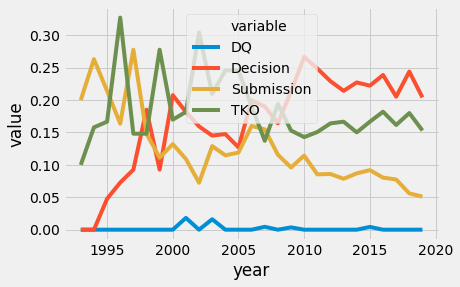

In [420]:
# test it with USA

usa_df = year_country_stats_df[year_country_stats_df["country"] == "United States"]
sns.lineplot(x=usa_df["year"], y=usa_df["value"], hue=usa_df["variable"])

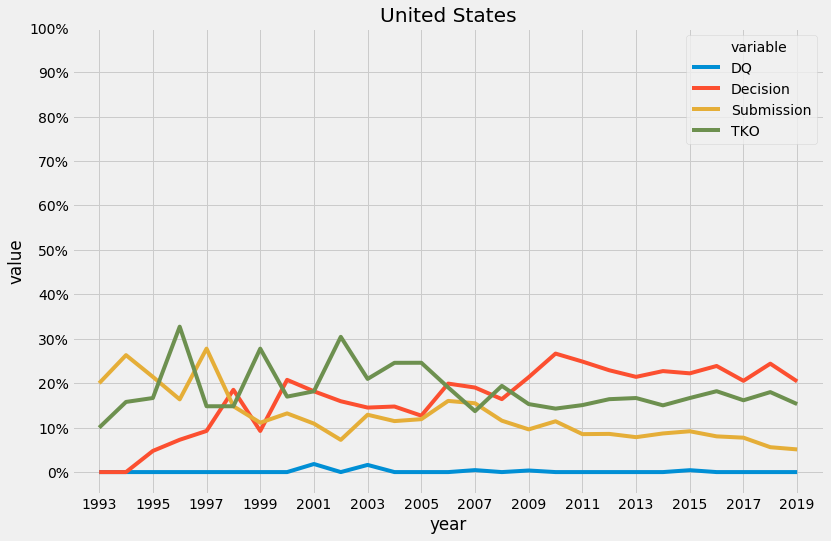

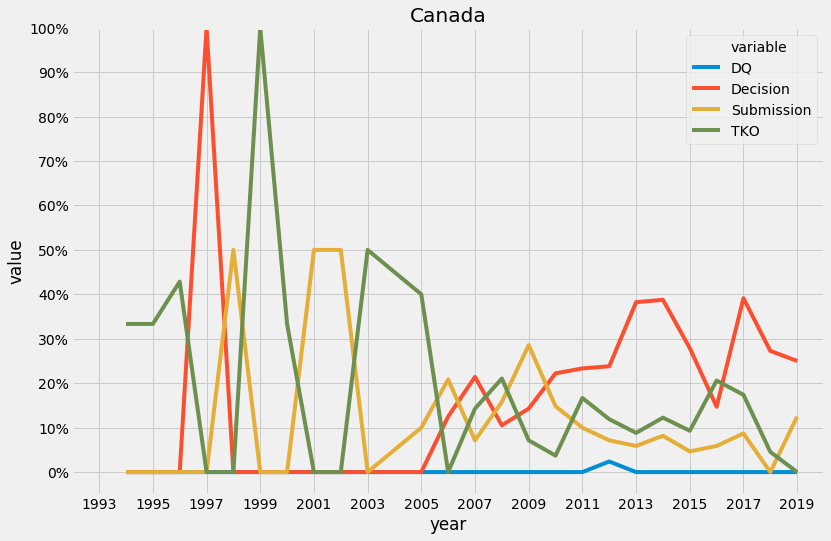

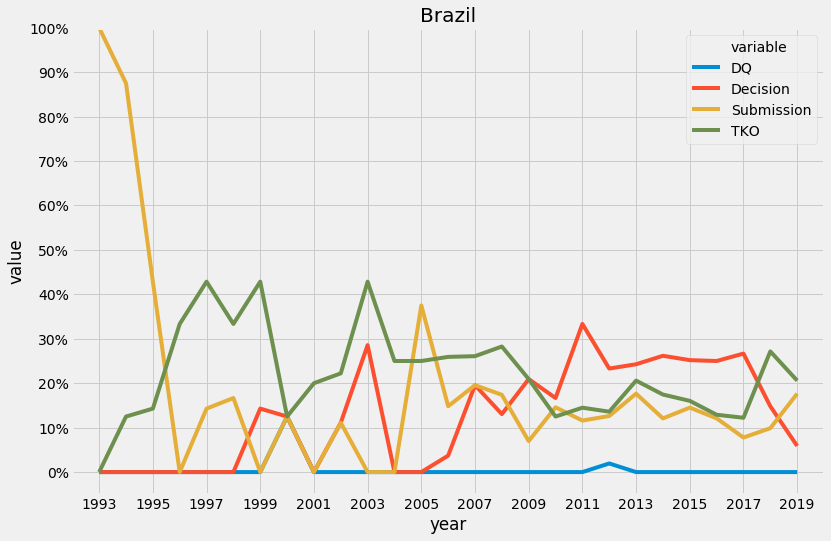

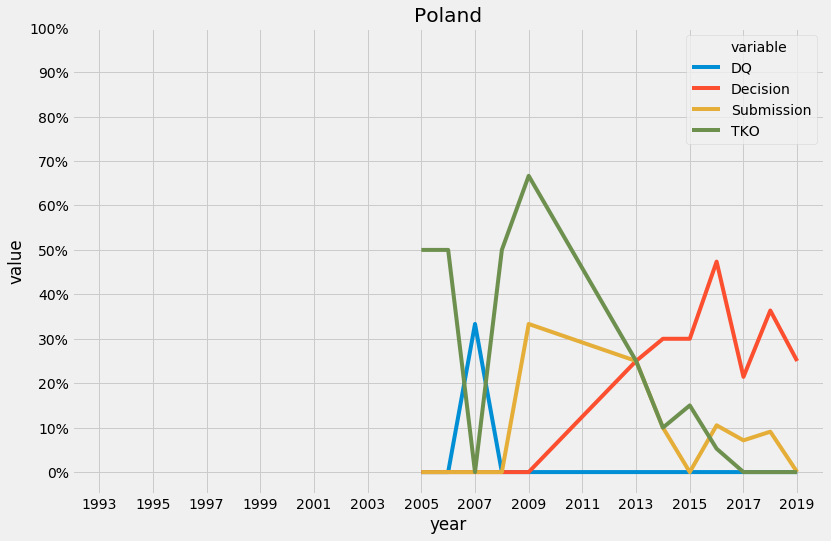

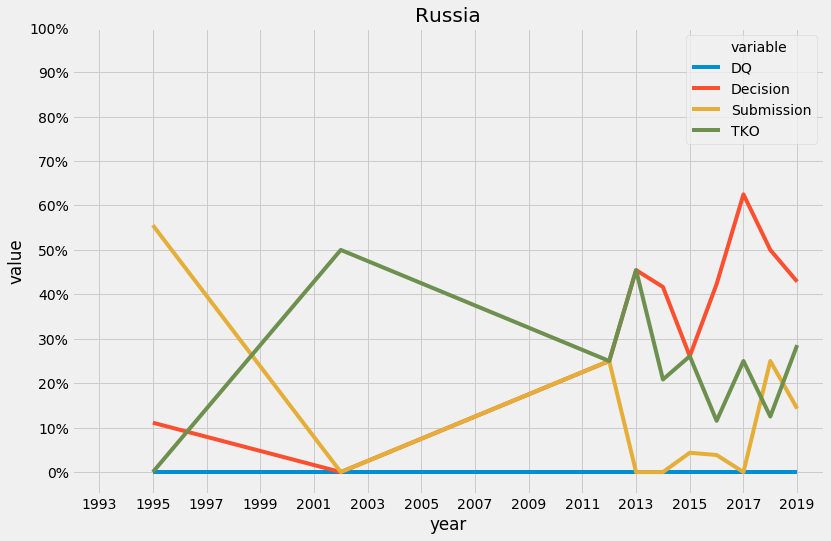

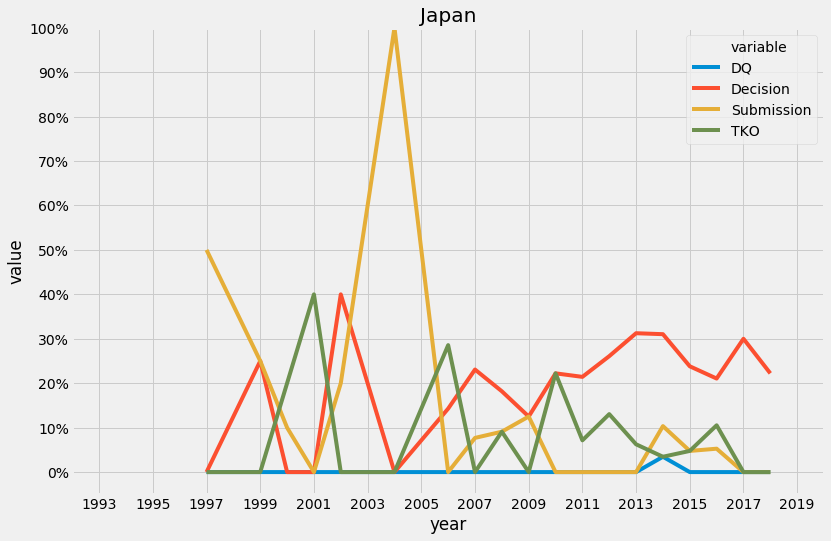

In [421]:
# Now do some more countries

for country in ['United States', "Canada", 'Brazil', 'Poland', 'Russia', "Japan"]:
  fig, ax = plt.subplots(figsize=(12, 8))
  country_df = year_country_stats_df[year_country_stats_df["country"] == country]
  sns.lineplot(x=country_df["year"], y=country_df["value"], hue=country_df["variable"], ax=ax)
  ax.set_title(country)
  ax.set_xlim([1992, 2020])
  ax.set_ylim([-0.05, 1.])
  ax.set_xticks(range(1993, 2020, 2))
  ax.set_yticks([x/100 for x in range(0, 101, 10)])
  ax.set_yticklabels([str(x)+"%" for x in range(0, 101, 10)])

In [422]:
year_country_stats_df["country"].value_counts()

Brazil                       108
United States                108
Canada                       100
Japan                         76
Netherlands                   72
England                       68
Belarus                       64
Australia                     52
France                        52
South Korea                   48
Poland                        48
Sweden                        44
Germany                       40
Russia                        40
Denmark                       32
Peru                          28
Mexico                        28
New Zealand                   28
Iceland                       28
Finland                       24
Argentina                     20
Ecuador                       20
Italy                         20
Scotland                      20
Afghanistan                   16
Croatia                       16
Ukraine                       16
Ireland                       16
Guam                          16
Northern Ireland              16
Czech Repu

In [431]:
# I think it would be interesting to re-do some of the number of fighters charts with geoplotting
!pip install geopandas
!pip install geoplot

import geopandas
import geoplot


  Using cached https://files.pythonhosted.org/packages/a0/40/40c264002dfba4736f35c3524f6a0e7a03458fb4fcc436ce501f541359b7/geoplot-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/92/fe8838fa8158931906dfc4f16c5c1436b3dd2daf83592645b179581403ad/Cartopy-0.17.0.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmpox2n_ijy Check the logs for full command output.


In [432]:

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

geoplot.polyplot(world, figsize=(8, 4))

NameError: ignored